In [58]:
import torch
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import json
import pandas as pd

In [59]:
fold_similarities = []

for fold in range(5):
    model = torch.load(f"models/baseline/mean/fold_{fold}.pth")
    weights = model["conv.weight"].squeeze(2)

    similarity = cosine_similarity(weights, weights)

    fold_similarities.append(similarity)

fold_similarities = np.stack(fold_similarities)
fold_similarities.shape

(5, 18, 18)

In [60]:
with open("data/samples.json", "r") as f:
    conditions = sorted(list(json.load(f).keys()))

conditions

['DNA_damage',
 'alpha_factor',
 'benomyl',
 'calcofluor',
 'congo_red',
 'exponential_growth',
 'grape_juice',
 'heat_shock',
 'high_calcium',
 'hydroxyurea',
 'low_nitrogen',
 'low_phosphate',
 'oxidative_stress',
 'salt',
 'sc_glycerol_media',
 'sc_media',
 'sorbitol',
 'stationary_phase']

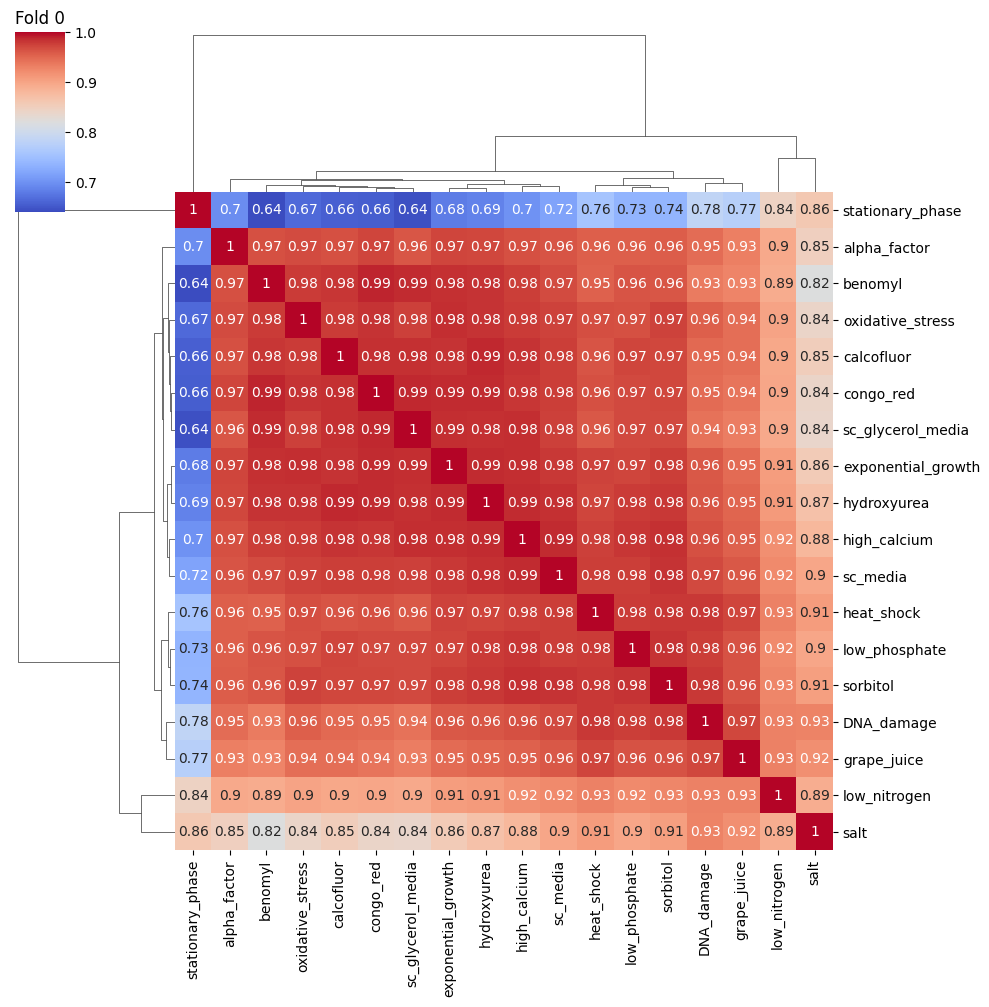

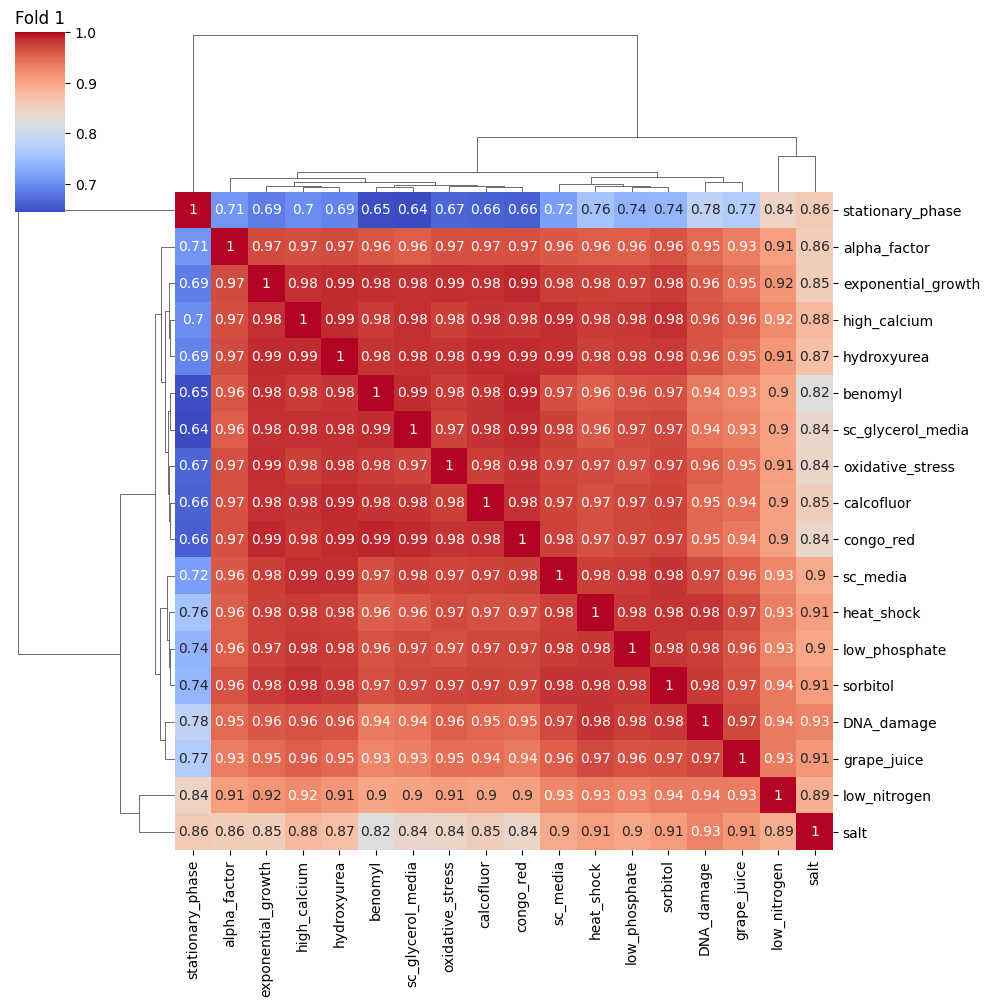

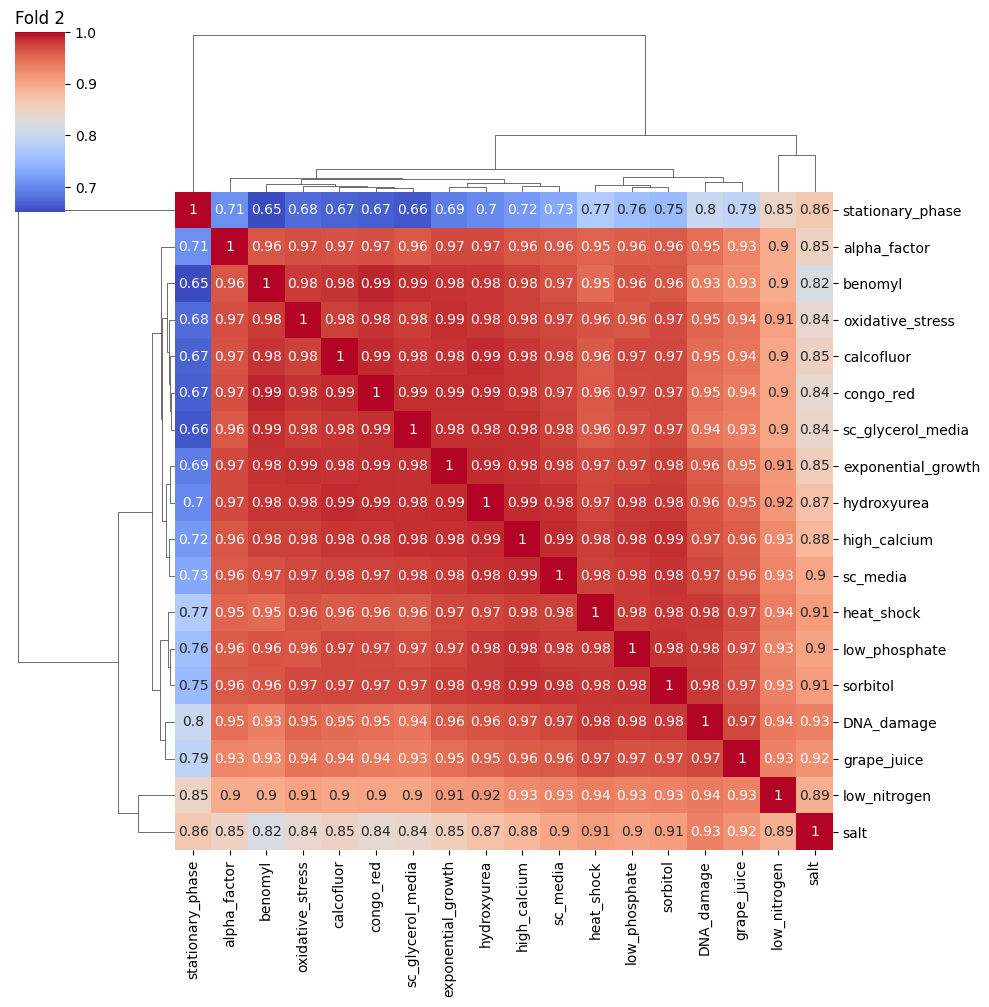

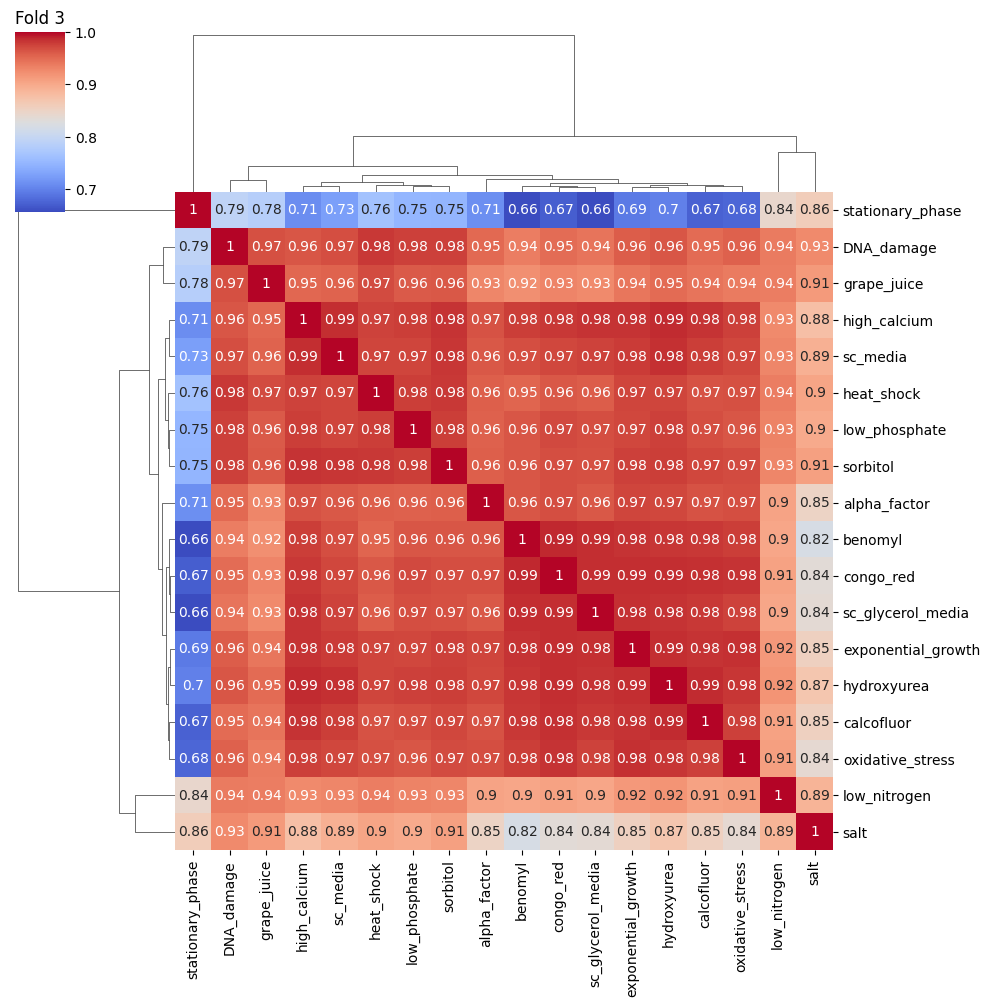

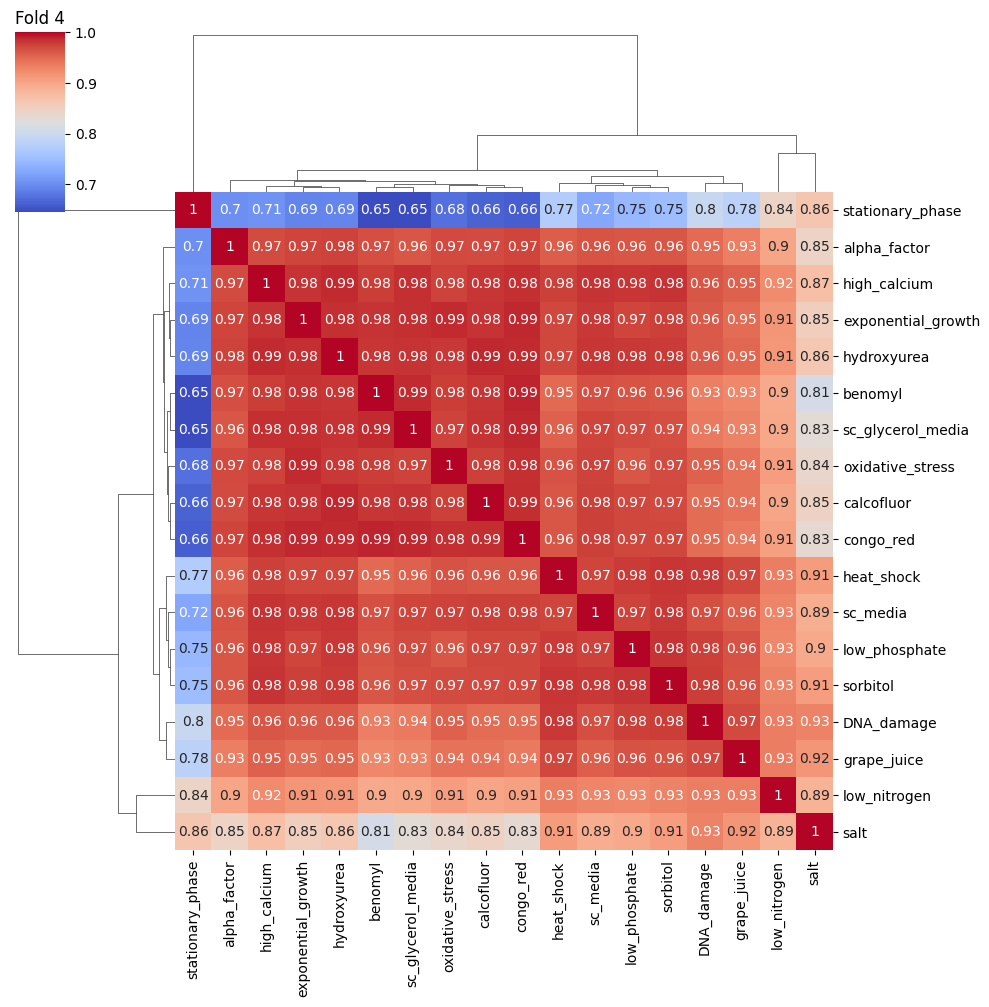

In [61]:
for fold in range(5):
    df = pd.DataFrame(fold_similarities[fold], index=conditions, columns=conditions)
    sns.clustermap(df, annot=True, cmap="coolwarm")
    plt.title(f"Fold {fold}")
    plt.show()

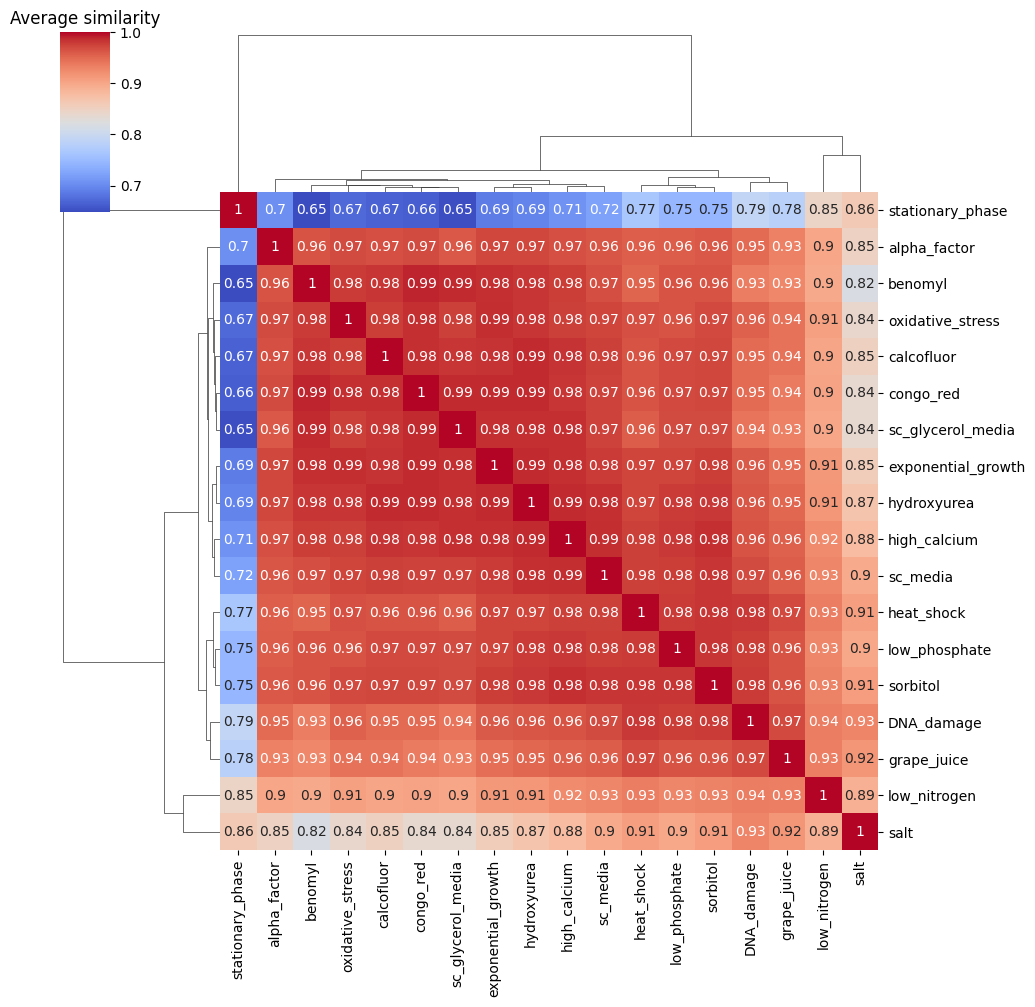

In [62]:
average_similarity = np.mean(fold_similarities, axis=0)
df = pd.DataFrame(average_similarity, index=conditions, columns=conditions)
sns.clustermap(df, annot=True, cmap="coolwarm")
plt.title("Average similarity")
plt.show()

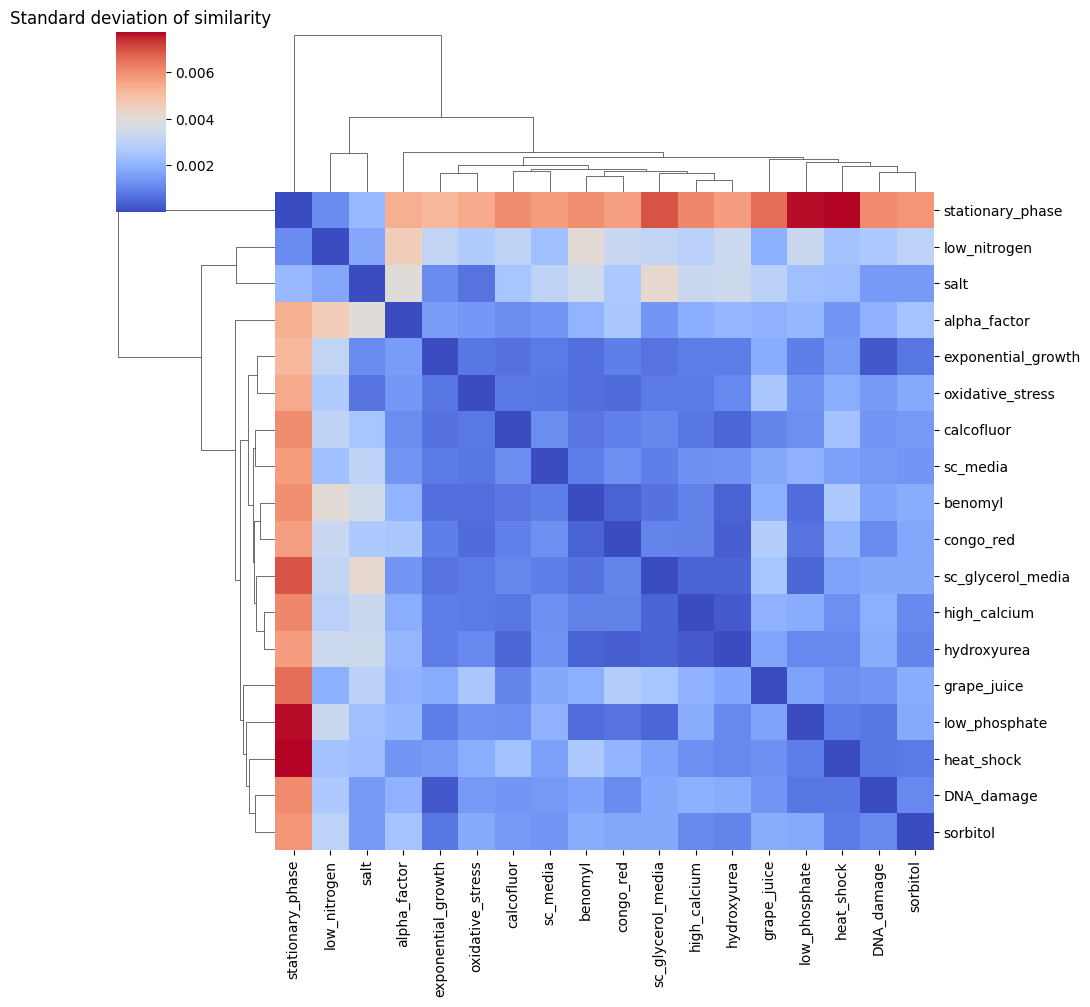

In [65]:
similarity_stdev = np.std(fold_similarities, axis=0)
df = pd.DataFrame(similarity_stdev, index=conditions, columns=conditions)
sns.clustermap(df, annot=False, cmap="coolwarm")
plt.title("Standard deviation of similarity")
plt.show()